# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [60]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [9]:
# your answer here-1st way (without pivot table)
employee.groupby(['Department'])['Salary'].agg('mean')

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [8]:
# your answer here-2nd way (with pivot table)
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [10]:
# your answer here
employee.pivot_table(index=['Department'], columns=['Title'], values=['Salary'], aggfunc='mean')

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [13]:
# your answer here
employee.pivot_table(index=['Department'], columns=['Title', 'Years'], values=['Salary'], aggfunc='mean')

Salary                                          
Title          VP analyst             associate            
Years           8       1     2     4         2     3     7
Department                                                 
HR           70.0     NaN  30.0  35.0       NaN   NaN   NaN
IT           70.0    35.0  30.0   NaN       NaN   NaN  60.0
Sales         NaN     NaN   NaN   NaN      55.0  55.0   NaN

In [19]:
# Otra forma de representarlo, poniendo Title como index.
employee.pivot_table(index=['Department', 'Title'], columns=['Years'], values=['Salary'], aggfunc='mean')

Salary                              
Years                     1     2     3     4     7     8
Department Title                                         
HR         VP           NaN   NaN   NaN   NaN   NaN  70.0
           analyst      NaN  30.0   NaN  35.0   NaN   NaN
IT         VP           NaN   NaN   NaN   NaN   NaN  70.0
           analyst     35.0  30.0   NaN   NaN   NaN   NaN
           associate    NaN   NaN   NaN   NaN  60.0   NaN
Sales      associate    NaN  55.0  55.0   NaN   NaN   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [23]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['mean', 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [24]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['median','min','max','std'])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [33]:
# your answer here

# La desviación típica es NaN porque solo hay un empleado sobre el que hacer el cálculo. En lugar de NaN, vamos a poner cero.

employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['median','min','max','std'], fill_value=0)

# No me funciona fill_value, y no tengo ni idea de por qué.

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [34]:
# your answer here
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc=['sum', 'count'])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [35]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], columns=['Years'], values=['Salary'], aggfunc='mean')

Salary                              
Years                     1     2     3     4     7     8
Department Title                                         
HR         VP           NaN   NaN   NaN   NaN   NaN  70.0
           analyst      NaN  30.0   NaN  35.0   NaN   NaN
IT         VP           NaN   NaN   NaN   NaN   NaN  70.0
           analyst     35.0  30.0   NaN   NaN   NaN   NaN
           associate    NaN   NaN   NaN   NaN  60.0   NaN
Sales      associate    NaN  55.0  55.0   NaN   NaN   NaN

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [44]:
# your answer here--Your custom function here
def mean_exceptmax(col):
    return (col.sum()-col.max())/col.count()

In [48]:
# your answer here
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc=mean_exceptmax)

,Salary
Department,
HR,21.666667
IT,31.250000
Sales,27.500000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [50]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [53]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [55]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [59]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

Text(0, 0.5, 'Steps')

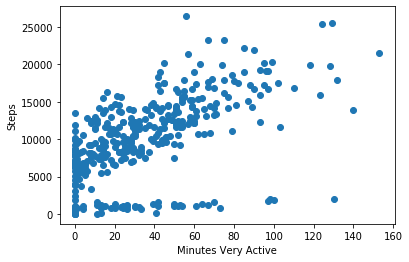

In [63]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here

# Hay una correlación positiva entre ambas variables. Normalmente, cuanto más minutos activo, más steps.
# También se puede ver que en varios casos de muchos minutos de actividad, los steps son prácticamente cero.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [64]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

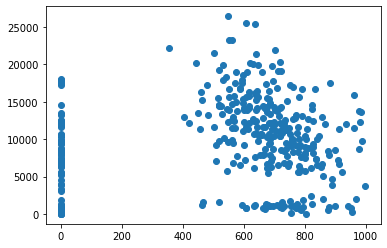

In [65]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

In [67]:
# Your comment here

# A pesar de que lo lógico sería pensar que debe existir una correlación negativa entre ambas variables, no existe una correlación.


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [66]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])


0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

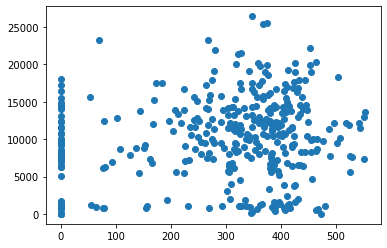

In [68]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

# No hay correlación.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [70]:
# your answer here
column = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()

In [71]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [74]:
# your answer here
cor_fit['Steps'].sort_values(ascending=False)

# La variable más correlacionada con Steps es Minutes Very Active.

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [75]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [76]:
#Print time_grades
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

In [77]:
# your answer here
pd.crosstab(time_grades['Study time'], time_grades['Grade'])

Grade,1,2,3,4,5,7,8,9
Study time,,,,,,,,
2,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0
7,0,0,1,0,0,0,1,0
8,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0
10,0,0,0,0,0,1,0,0


#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [79]:
# your answer here-Pearson
time_grades['Study time'].corr(time_grades['Grade'], method = 'pearson')

0.7980456073578858

In [80]:
## your answer here-Spearman
time_grades['Study time'].corr(time_grades['Grade'], method = 'spearman')

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

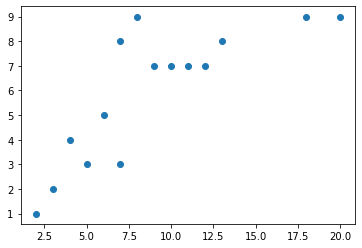

In [81]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

In [34]:
#your comment here

# Existe una correlación positiva bastante alta entre ambas variables.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#your comment here

La correlación de Pearson evalúa la relación lineal entre dos variables continuas, mientras que la de Spearman sirve tanto para variables continuas como discretas.

La correlación de Spearman entre dos variables es igual a la correlación de Pearson entre los valores de rango de esas dos variables; mientras que la correlación de Pearson evalúa las relaciones lineales, la correlación de Spearman evalúa las relaciones monótonas (sean o no lineales). Si no hay valores de datos repetidos, se produce una correlación Spearman perfecta de +1 o -1 cuando cada una de las variables es una función monótona perfecta de la otra.

Es decir, una correlación de Spearman de 1 resulta cuando las dos variables que se comparan están relacionadas monótonamente, incluso si su relación no es lineal. Esto significa que todos los puntos de datos con valores de x mayores que los de un punto de datos dado también tendrán valores de y mayores. En contraste, esto no da una correlación perfecta de Pearson.

Cuando los datos están distribuidos aproximadamente de forma elíptica y no hay valores atípicos prominentes, la correlación de Spearman y la correlación de Pearson dan valores similares.

La correlación de Spearman es menos sensible que la de Pearson a los fuertes valores atípicos que se encuentran en las colas de ambas muestras. Esto se debe a que el rho de Spearman limita el valor atípico de su rango.